Sensitivity analysis
============

__Goal__:
 - run sensitivity analysis to show the impact of a given parameter on the SMRT output
  
__Learning__: 
 

SMRT is able to iterate on several arguments when it is unambiguous. For instance, a sensor with multiple frequencies, angles or polarizations is automatically understood. The `result` contains all the values which can be accessed with arguments in TbV() and similar function. E.g. TbV(frequency=37e9)

This is similar when a list of snowpacks is given to `run`. The `result` contains all the computations. The 'snowpack' dimension is automatically added but we can also propose a custom name for this dimension.

In the following, we show different approaches to conduct sensitivity studies that  you can run and then apply to a study case of your choice:
 - take the Dome C snowpack and study the sensitivity of TbH 55° to superficial density
 - take any snowpack previously defined and investigated the sensivitiy to liquid_water
 - etc
 

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

from smrt import make_model, make_snowpack, sensor_list
from smrt.utils import dB

Build a list of snowpack
--------------------------------

The key idea is to build a list of snowpack. E.g. we want to test the sensitivity of TB's to the radius. We first build a list of snowpack with different radius.

In [3]:
# prepare the snowpack
density = 300.0
radius = np.arange(0.05, 0.5, 0.01) *1e-3  # from 0 to 0.5mm

# the NAIVE APPROACH:

snowpack = list()
for x in radius:
    sp = make_snowpack([10], "sticky_hard_spheres", density=density, temperature=265, radius=x, stickiness=0.15)
    snowpack.append(sp)

In simple cases (as this one), it is easier to use "list comprehension", a nice python feature to create list.

In [4]:
snowpack = [make_snowpack([10], "sticky_hard_spheres", density=density, temperature=265, radius=x, stickiness=0.15) for x in radius]

In [5]:
# prepare the sensor and model

model = make_model("iba", "dort")
sensor = sensor_list.passive(37e9, 55)

#run!

Now we have a list of snowpacks, we want to call the model for each snowpack. We can use list comprehension again.

In [6]:
results = [model.run(sensor, sp) for sp in snowpack]

This return a list of results. To extract the TB V for each result can be done with another list comprehension. And then we plot the results.

<IPython.core.display.Javascript object>


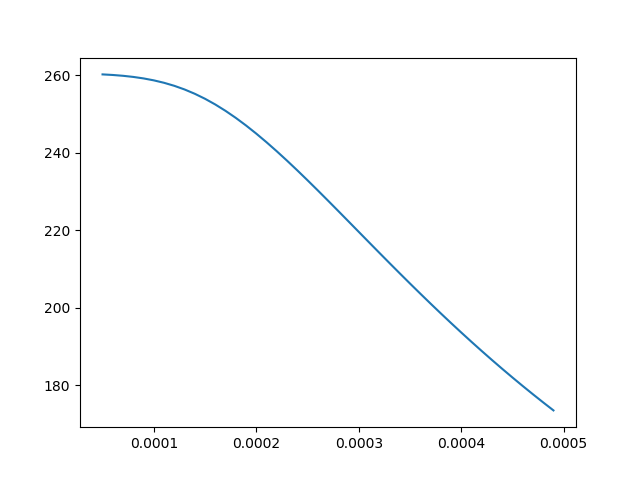

In [7]:
tbv = [res.TbV() for res in results]
plt.figure()
plt.plot(radius, tbv)

Nice ? We can do better because `Model` can directly run on a list of snowpacks. It does not return a list of results, but **a unique result with a new coordinate** which is more convenient.

In [8]:
results = model.run(sensor, snowpack, snowpack_dimension=('radius', radius))
print(type(results))  # look results is a Result
print()
print(results.coords) # look, we have several coordinates, one is call corr_legn

<class 'smrt.core.result.Result'>

Coordinates:
  * theta         (theta) float64 0.9599
  * polarization  (polarization) <U1 'V' 'H'
  * radius        (radius) float64 5e-05 6e-05 7e-05 8e-05 9e-05 0.0001 ...


This is more compact and nicer, `results` explicitly show the radius dimension. Plotting is thus easier:

<IPython.core.display.Javascript object>


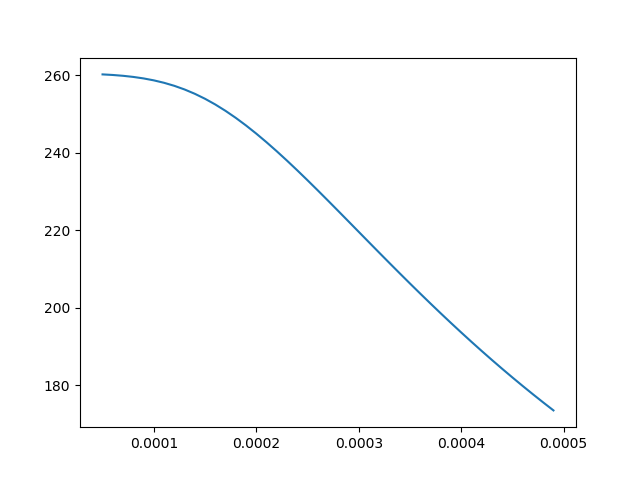

In [9]:
plt.figure()
plt.plot(radius, results.TbV())

And it is easy to save the result to disk:

In [10]:
results.save("radius-sensitivity.nc")

Recap:
---------

<IPython.core.display.Javascript object>


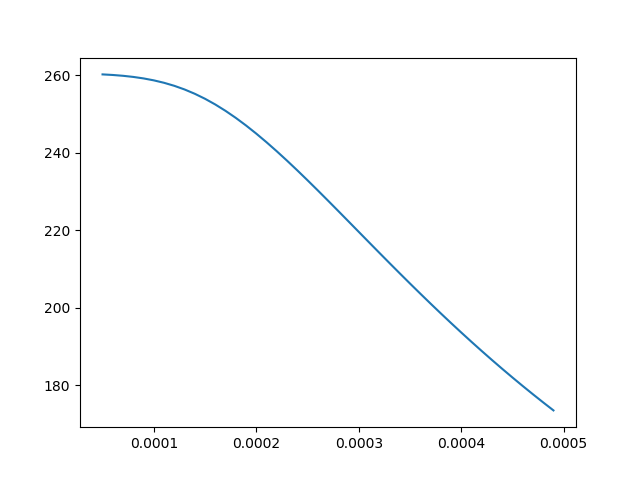

In [11]:
snowpack = [make_snowpack([10], "sticky_hard_spheres", density=density, temperature=265, radius=x, stickiness=0.15) for x in radius]

model = make_model("iba", "dort")
sensor = sensor_list.passive(37e9, 55)

results = model.run(sensor, snowpack, snowpack_dimension=('radius', radius))

plt.figure()
plt.plot(radius, results.TbV())